In [2]:
import os
import wget
import tarfile

labeled_faces_tgz = 'lfw-funneled.tgz'
labeled_faces_folder = os.path.join(os.getcwd(), 'lfw_funneled')

if not os.path.isfile(labeled_faces_tgz):
    print("Downloading file...\n")

    wget.download('http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz', labeled_faces_tgz)
    dateDownloaded = !date #Calling Linux
    print("File downloaded on:", dateDownloaded[0])

    os.mkdir(labeled_faces_folder)

    with tarfile.open(labeled_faces_tgz) as tar:
        tar.extractall(path=os.getcwd())

    print("Files extracted")

In [3]:
faces_paths = []
faces_no = 0

for subdir, dirs, files in os.walk(labeled_faces_folder):
    if len(dirs) == 0:
        if len(files) >= 70:
            faces_paths.append(subdir)
            faces_no += len(files)

print("Number of different faces", len(faces_paths))
print("Total number of faces", faces_no)

Number of different faces 7
Total number of faces 1288


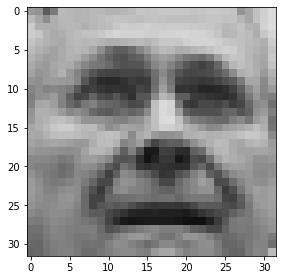

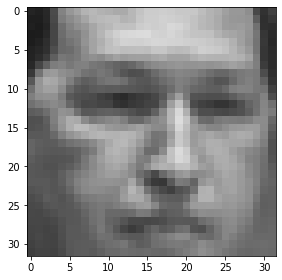

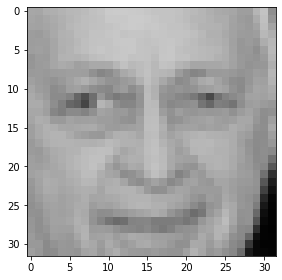

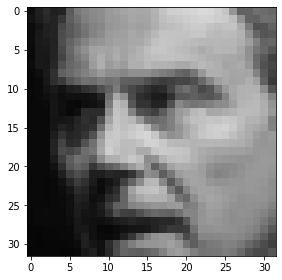

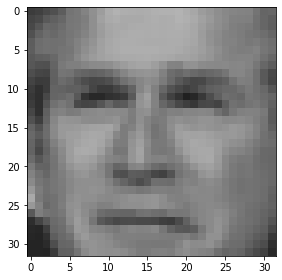

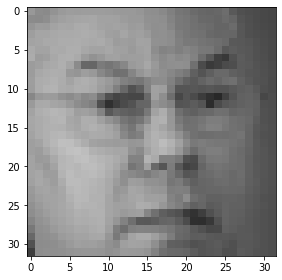

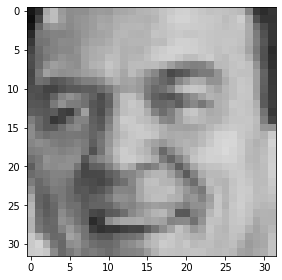

In [4]:
from skimage import io
from skimage.transform import rescale, resize
from matplotlib import pyplot as plt

test_faces = []

for faces_path in faces_paths:
    label = os.path.split(faces_path)[-1]
    faces = [files for _, _, files in os.walk(faces_path)][0]
    faces.sort()

    test_faces.append(os.path.join(faces_path, faces.pop()))

    for face in faces:
        face_path = os.path.join(faces_path, face)

        face_ndarray = io.imread(face_path, as_gray=True)
        face_ndarray = face_ndarray[75:175,75:175]
        face_ndarray = resize(face_ndarray, (32, 32))

        io.imshow(face_ndarray)
        plt.show()
        break